In [1]:
library(ggplot2)

In [2]:
endo_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/"

In [3]:
#### MOFA
mofa_filename = paste0(endo_folder, 'MOFA10/new4/summary.csv')
mofa = read.csv(mofa_filename, row.names=1)
mofa$gene_name = mofa$gene
mofa$gene = gsub("_.*","",mofa$gene)
mofa = mofa[mofa$chrom == 22,]
head(mofa,2)
nrow(mofa)

,gene,n_snps,chrom,pv_raw,snpID,pv,gene_name
15,ENSG00000189306,3,22,0.09209385,22_42896474_T_C,0.2762815,ENSG00000189306_RRP7A
16,ENSG00000189306,3,22,0.01806787,22_42897414_A_C,0.0542036,ENSG00000189306_RRP7A


[1] 121

In [4]:
######## PCA
pca1_filename = paste0(endo_folder,"REVISION/CRM_int_PCA/summary_new.csv")
pca1 = read.csv(pca1_filename)
pca1$snpID = pca1$variant
pca1$pv_raw = pca1$pv
pca1$gene_name = pca1$gene
pca1$gene = gsub("_.*","",pca1$gene)
pca1$X <- c()
head(pca1,2)
nrow(pca1)

chrom,gene,pv,variant,snpID,pv_raw,gene_name
22,ENSG00000100058,6.129443e-10,22_25845855_C_G,22_25845855_C_G,6.129443e-10,ENSG00000100058_CRYBB2P1
22,ENSG00000100058,1.097532e-02,22_25924999_G_A,22_25924999_G_A,1.097532e-02,ENSG00000100058_CRYBB2P1


[1] 121

In [5]:
library(dplyr)
df1 = inner_join(mofa, pca1, by=c("snpID","gene"), suffix=c(".m",".p"))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
x = df1$pv_raw.m
y1 = df1$pv_raw.p
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 17.412, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7881364 0.8911226
sample estimates:
      cor 
0.8474184 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 31.974, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9240385 0.9623540
sample estimates:
      cor 
0.9464326 


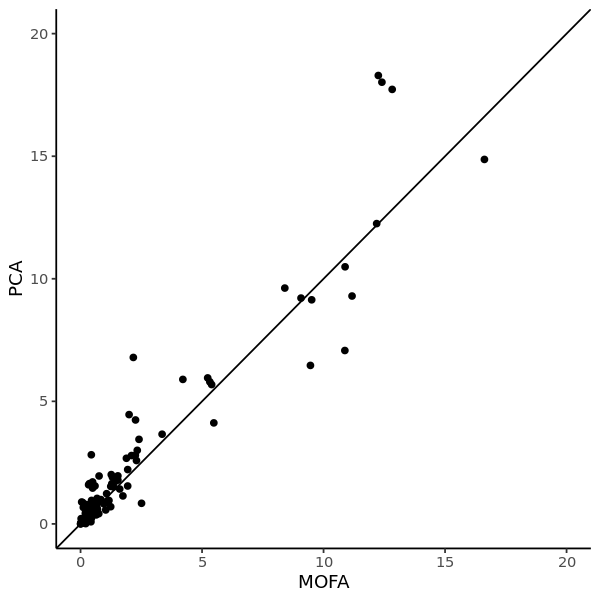

In [8]:
options(repr.plot.width = 5, repr.plot.height = 5)
p1 = ggplot(df1, aes(x=-log10(pv_raw.m), y=-log10(pv_raw.p))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("PCA") + xlim(c(0,20)) + ylim(c(0,20))
p1

In [9]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF10_scatterplot_MOFA_PCA.pdf"), width=5, height=5)
p1
dev.off()

png 
  2

In [579]:
##### LDVAE

In [31]:
ld_filename = paste0(endo_folder,"REVISION/CRM_int_LDVAE/summary_new.csv")
ld = read.csv(ld_filename)
ld$snpID = ld$variant
ld$pv_raw = ld$pv
ld$gene_name = ld$gene
ld$gene = gsub("_.*","",ld$gene)
ld$X <- c()
head(ld,2)
nrow(ld)

chrom,gene,pv,variant,snpID,pv_raw,gene_name
22,ENSG00000100058,1.913650e-07,22_25845855_C_G,22_25845855_C_G,1.913650e-07,ENSG00000100058_CRYBB2P1
22,ENSG00000100058,1.247358e-01,22_25924999_G_A,22_25924999_G_A,1.247358e-01,ENSG00000100058_CRYBB2P1


[1] 121

In [32]:
df2 = inner_join(mofa, ld, by=c("snpID","gene"), suffix=c(".m",".l"))

In [33]:
x = df2$pv_raw.m
y1 = df2$pv_raw.l
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 10.538, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5893611 0.7769168
sample estimates:
      cor 
0.6947687 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 12.199, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6539532 0.8154330
sample estimates:
      cor 
0.7454361 


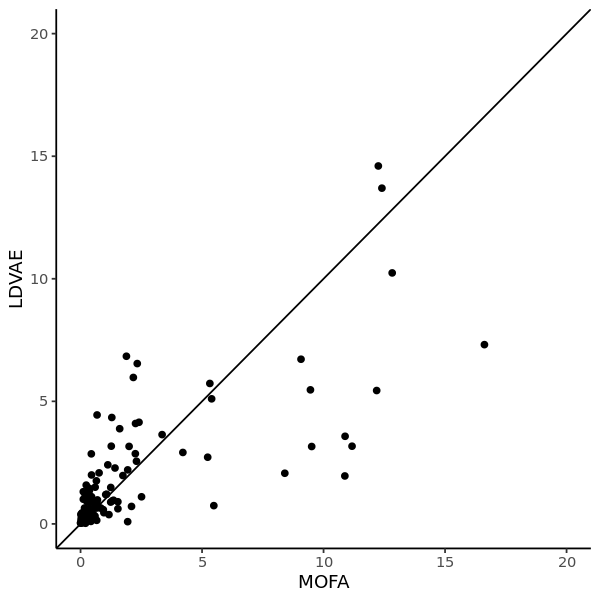

In [34]:
options(repr.plot.width = 5, repr.plot.height = 5)
p1 = ggplot(df2, aes(x=-log10(pv_raw.m), y=-log10(pv_raw.l))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("LDVAE") + xlim(c(0,20)) + ylim(c(0,20))
p1

In [15]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF10_scatterplot_MOFA_LDVAE.pdf"), width=5, height=5)
p1
dev.off()

png 
  2

In [134]:
##### ZINB-WaVE

In [35]:
zw_filename = paste0(endo_folder,"REVISION/CRM_int_ZINB-WaVE/summary_new.csv")
zw = read.csv(zw_filename)
zw$snpID = zw$variant
zw$pv_raw = zw$pv
zw$gene_name = zw$gene
zw$gene = gsub("_.*","",zw$gene)
zw$X <- c()
head(zw,2)
nrow(zw)

chrom,gene,pv,variant,snpID,pv_raw,gene_name
22,ENSG00000100058,0.001058924,22_25845855_C_G,22_25845855_C_G,0.001058924,ENSG00000100058_CRYBB2P1
22,ENSG00000100058,0.001896708,22_25924999_G_A,22_25924999_G_A,0.001896708,ENSG00000100058_CRYBB2P1


[1] 121

In [36]:
df1 = inner_join(mofa, zw, by=c("snpID","gene"), suffix=c(".m",".z"))

In [37]:
x = df1$pv_raw.m
y1 = df1$pv_raw.z
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 10.31, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5794064 0.7708533
sample estimates:
      cor 
0.6868658 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 22.26, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8568045 0.9277599
sample estimates:
      cor 
0.8979687 


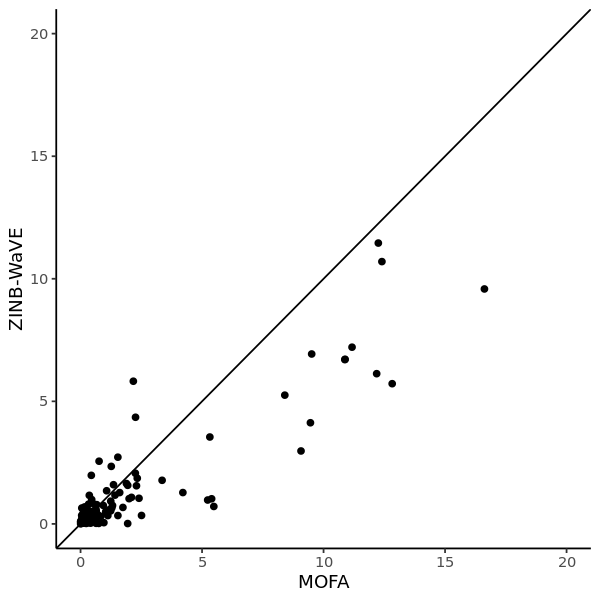

In [38]:
options(repr.plot.width = 5, repr.plot.height = 5)
p1 = ggplot(df1, aes(x=-log10(pv_raw.m), y=-log10(pv_raw.z))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("ZINB-WaVE") + xlim(c(0,20)) + ylim(c(0,20))
p1

In [39]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF10_scatterplot_MOFA_ZINB_WAVE.pdf"), width=5, height=5)
p1
dev.off()

png 
  2